In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
dataset_dir = "caltech-101" #Specifies the directory path where the dataset is located
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)
#normalises the image

# # here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64), #resizes the image into 64 by 64 pixel
    batch_size=batch_size, #Sets the batch size for training.
    class_mode='categorical' # labels are one-hot encoded
)

Found 8856 images belonging to 102 classes.


In [4]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [6]:
from tensorflow.keras.applications import VGG16

In [7]:
base_model = VGG16(weights=None, include_top=False, input_shape=(64, 64, 3))

In [8]:
for layer in base_model.layers:
   layer.trainable = False

In [9]:
x = Flatten()(base_model.output)
# Explanation: This line adds a Flatten layer to the output of the base_model. The Flatten layer is used to transform the 3D tensor output from the convolutional base (which is usually the output of the last convolutional layer) into a 1D tensor. This flattening step is necessary when transitioning from convolutional layers to densely connected layers.
# Example: Suppose the output shape of base_model is (7, 7, 512). This means you have a 3D tensor with dimensions 7x7x512. Applying the Flatten layer converts this 3D tensor into a 1D tensor by unraveling the values along the dimensions. In this case, the resulting 1D tensor would have a size of 7 * 7 * 512 = 25088.
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0625 - loss: 4.6155 - val_accuracy: 0.0850 - val_loss: 4.5785
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1016 - loss: 4.5549 - val_accuracy: 0.0850 - val_loss: 4.4829
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1070 - loss: 4.4395 - val_accuracy: 0.0850 - val_loss: 4.3466
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.1065 - loss: 4.2947 - val_accuracy: 0.0850 - val_loss: 4.2501
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.1049 - loss: 4.2175 - val_accuracy: 0.0850 - val_loss: 4.2191
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.0949 - loss: 4.2269 - val_accuracy: 0.0850 - val_loss: 4.2147
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.0982 - loss: 4.1851 - val_accuracy: 0.0850 - val_loss: 4.2111
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.1070 - loss: 4.1628 - val_accuracy: 0.0850 - val_loss:

In [11]:
base_model = VGG16(weights=None, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.0723 - loss: 4.4762 - val_accuracy: 0.1000 - val_loss: 4.2123
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.0909 - loss: 4.2723 - val_accuracy: 0.0850 - val_loss: 4.2122
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.1059 - loss: 4.1997 - val_accuracy: 0.0850 - val_loss: 4.1935
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.0959 - loss: 4.2052 - val_accuracy: 0.0850 - val_loss: 4.1697
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.1098 - loss: 4.1643 - val_accuracy: 0.1270 - val_loss: 4.1454
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.1324 - loss: 4.1254 - val_accuracy: 0.1395 - val_loss: 4.0877
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1482 - loss: 4.0580 - val_accuracy: 0.1585 - val_loss: 4.0099
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1619 - loss: 3.9545 - val_accuracy: 0.1535 - val_loss:

In [12]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 318ms/step


In [13]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  Faces
Actual:  Faces


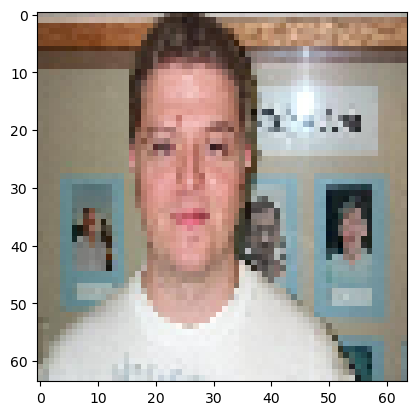

In [14]:
n = 887

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])